In [141]:
import pandas as pd 
import numpy as np 

In [142]:
df = pd.read_csv('Data\heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


`id` (Unique id for each patient)\
`age` (Age of the patient in years)\
`origin` (place of study)\
`sex` (Male/Female)\
`cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])\
`trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))\
`chol` (serum cholesterol in mg/dl)\
`fbs` (if fasting blood sugar > 120 mg/dl)\
`restecg` (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]\
`thalach`: maximum heart rate achieved\
`exang`: exercise-induced angina (True/ False)\
`oldpeak`: ST depression induced by exercise relative to rest\
`slope`: the slope of the peak exercise ST segment\
`ca`: number of major vessels (0-3) colored by fluoroscopy\
`thal`: [normal; fixed defect; reversible defect]\
`num`: the predicted attribute

In [144]:
for column in df.select_dtypes(include=['object']).columns:
    # print (f"Column: {column}")
    print (df[column].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
fbs
False    692
True     138
Name: count, dtype: int64
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
exang
False    528
True     337
Name: count, dtype: int64
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


In [145]:
# check for missing values
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [146]:
# Filling missing values in object columns with 'Unknown'
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].replace(np.nan, 'Unknown')

#  Filling missing values in float64 columns with 0
df_copy = df.copy()

for column in df_copy.select_dtypes(include=['float64', 'int64']).columns:
    df_copy[column] = df_copy[column].replace(np.nan, 0)

# Changing 'ca' column to object type(categorical)[binning]
df_copy['ca'] = df_copy['ca'].astype(object)

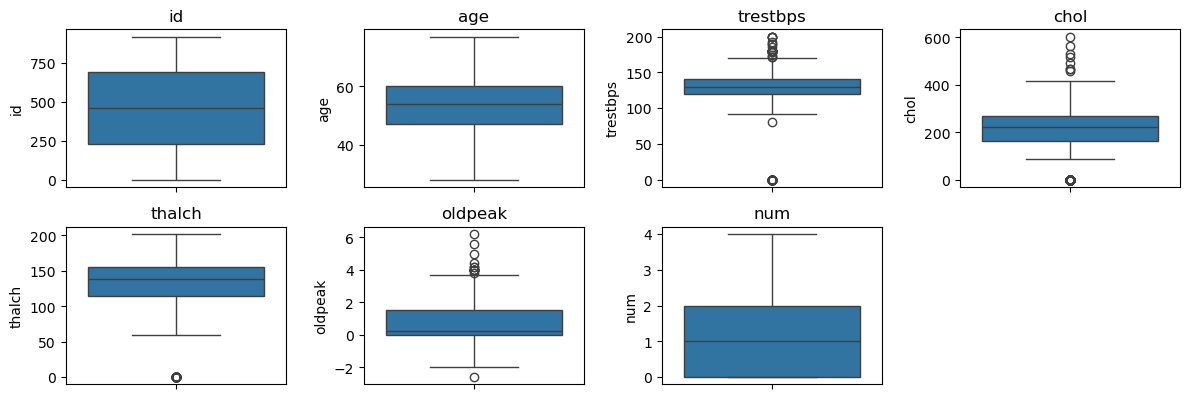

In [147]:
from matplotlib import pyplot as plt
import seaborn as sns

# Box plots for numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df_copy.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_copy, y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

After viewing the numerical columns, filling the missing data with `0` creates a huge outlier problem in some columns that is; `oldpeak`, `ca`, `chol`, `trestbps`, `thalch`.\
https://towardsdatascience.com/dont-throw-away-your-outliers-c37e1ab0ce19/ 

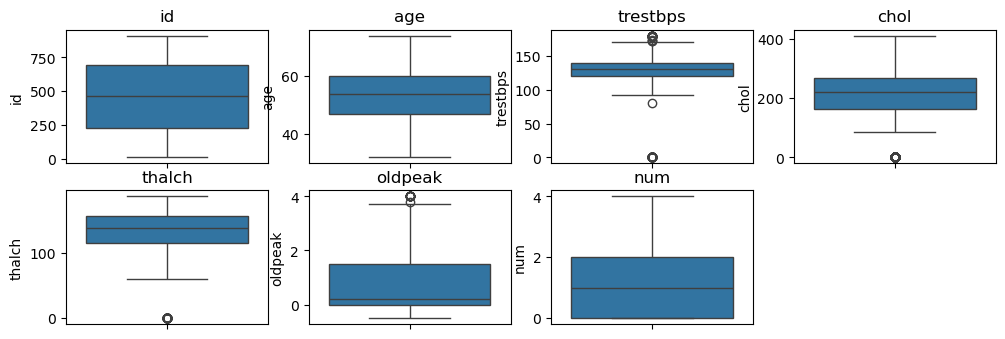

In [148]:
# Define the function for Winsorization
def winsorize(data, columns, lower_percentile=0.01, upper_percentile=0.99):
    for col in columns:
        lower_bound = data[col].quantile(lower_percentile)
        upper_bound = data[col].quantile(upper_percentile)
        data[col] = np.clip(data[col], lower_bound, upper_bound)
    return data

# Apply Winsorization to numerical columns
numerical_columns = df_copy.select_dtypes(include=['float64', 'int64']).columns
df = winsorize(df_copy, numerical_columns, lower_percentile=0.01, upper_percentile=0.99)

# Verify the effect of winsorization
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=feature)
    plt.title(feature)
